In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys

#sys.path.append("..\lflPython\fitTools")
from fitTools.Resonator import Resonator

In [3]:
datapath = 'G:\\Shared drives\\LFL\\Labber\\Data\\2022\\12\\Data_1212\\'
f_name = 'diss08-t2-vnaResSpec_tuneFlux_7.hdf5'

f = h5py.File(datapath + f_name,'r')

for key in f.keys():
    print(key)
    #print(type(f[key]))
#print('break')
#print(f['Data']['Data'])
for key in f['Data'].keys():
    #print(key)
    print(type(f['Data'][key]))
    
s21 = f['Traces']['Agilent Network Analyzer E5071B - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer E5071B - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer E5071B - S21_t0dt'][0][()]

#guess_current = np.linspace(f['Data']['Data'])

freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)
#print(freqs)


Channels
Data
Instrument config
Instruments
Log list
Settings
Step config
Step list
Tags
Traces
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>


(1601,)
(1601, 2, 51)
18.33597755432129


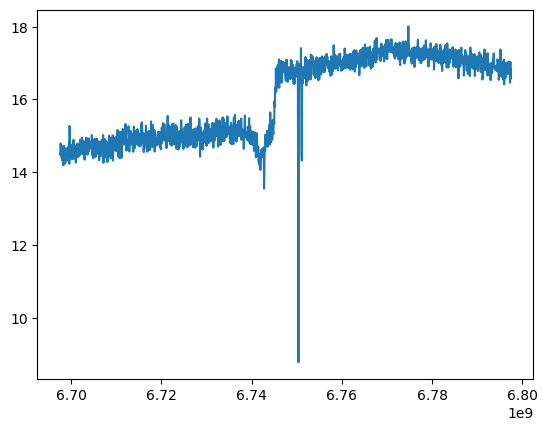

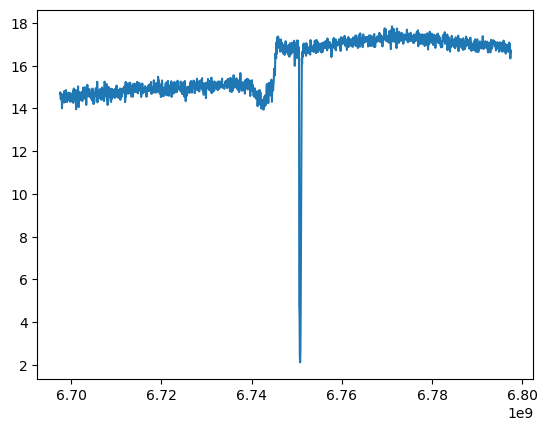

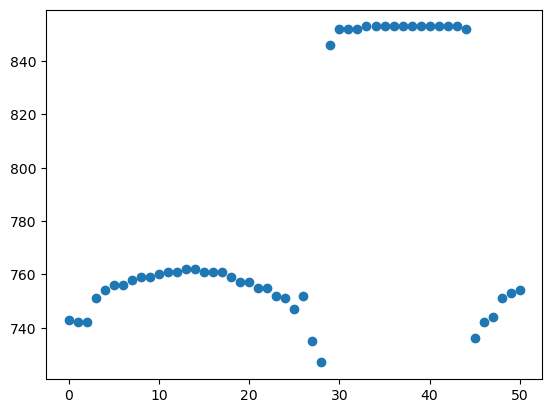

In [4]:
plt.plot(freqs,s21[:,0,29])
plt.figure()
plt.plot(freqs,s21[:,0,44])
print(np.shape(freqs))
print(np.shape(s21))
s21_complex = s21[:,0,:]+1j*s21[:,1,:]
print(np.max(s21[:,0,:]))
#plt.imshow(s21[:,0,:],aspect='auto',origin='lower')
#plt.figure()
#plt.imshow(s21[:,1,:],aspect='auto',origin='lower')
#plt.figure()
#plt.contourf(s21[:,0,:])
#plt.show()
currents = np.arange(0,51,1)
s21_reduced_dim = np.zeros(51)
for i in range(51):
    s21_reduced_dim[i] = np.argmin(s21[:,0,i])
    
plt.figure() 
plt.scatter(currents,s21_reduced_dim)


In [5]:
s21_resfit = np.zeros(51)
print(np.shape(freqs))
print(np.shape(s21_complex[:,i]))
for i in range(51):
    print(i)
    res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,i])
    res.autofit(fcrop=(6.72,6.78))
    s21_resfit[i] = res.f0
    #res.show()
    #print(res)
#print(s21_resfit)

(1601,)
(1601,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
fit error = [6.36256827e-06 2.96597718e-01 4.17043843e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
29
fit error = [6.64428851e-06 1.42222363e+00 7.90273704e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
30
31
fit error = [7.19710289e-06 8.41540136e-02 3.16719938e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
32
33
34
35
36
37
38
39
40
41
42
43
44
fit error = [4.78759656e-06 1.11773544e-01 3.66963554e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
45
46
47
48
49
50
fit error = [4.25446366e-05 2.15607338e+00 2.17171842e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))


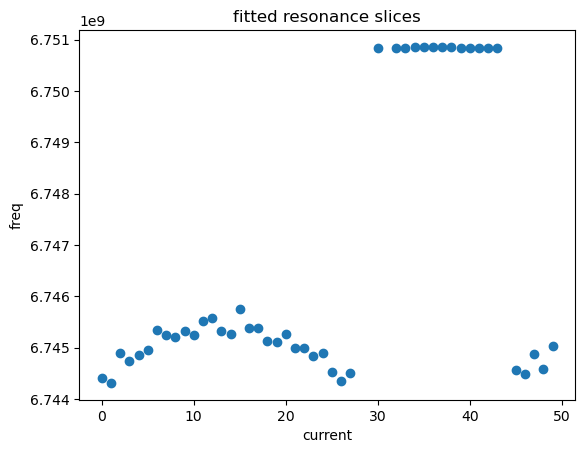

In [6]:
## Visualize fitted resonance slices
plt.scatter(currents,s21_resfit)
plt.xlabel("current");
plt.ylabel("freq");
plt.title("fitted resonance slices")
plt.show()

fit error = [6.51489248e-06 2.39196728e+00 5.08142082e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))


C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


AttributeError: 'Resonator' object has no attribute 'z_data_sim'

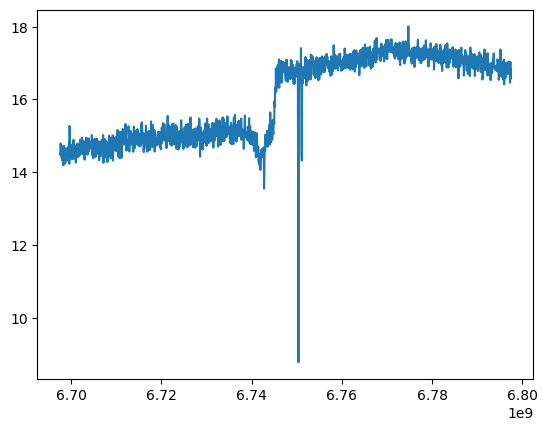

In [7]:
## check res fits that failed
test=29
plt.plot(freqs,s21_complex[:,test])
res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,test])
res.autofit(fcrop=(6.749,6.76))
res.show()
print(res)

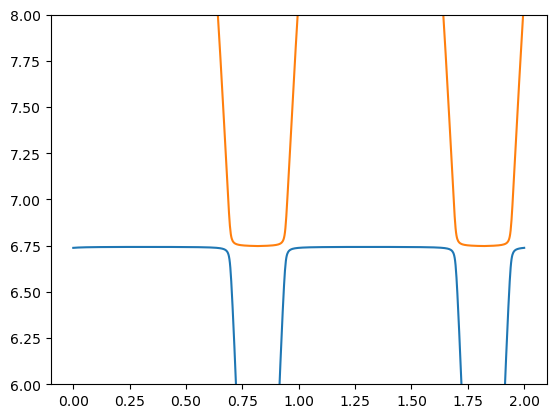

In [12]:
## define fitting functions

#1/2 flux quantum is about 36-14=22 current steps * 10uA/step = 220 uA
from scipy.optimize import curve_fit
import math

def avoided_crossing_lower(x, wq_max, wc, g,phi_offset):
    wq = wq_max*np.emath.sqrt(abs( (np.cos(np.pi*x-phi_offset))))
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2) )

def avoided_crossing_upper(x, wq_max, wc, g, phi_offset):
    wq = wq_max*np.emath.sqrt(abs(np.cos(np.pi*x-phi_offset)))
    return 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2) )


x = np.linspace(0,2,1000)
plt.plot(x,avoided_crossing_lower(x,11,6.745,.1,1))
plt.plot(x,avoided_crossing_upper(x,11,6.745,.1,1))
plt.ylim([6,8])
plt.show()

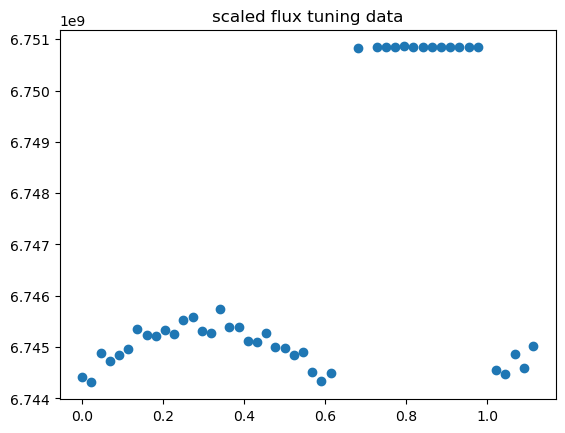

<class 'numpy.float64'>


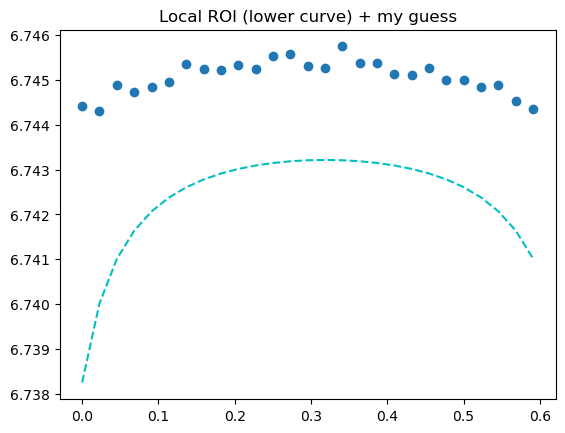

[177.3318969    6.74704515   1.9552988    0.93706703]


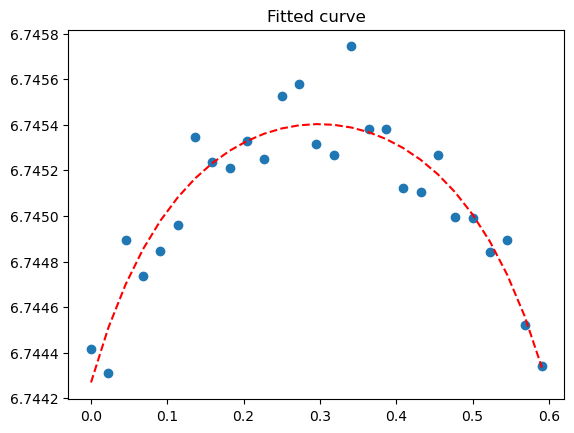

6.750850313057884


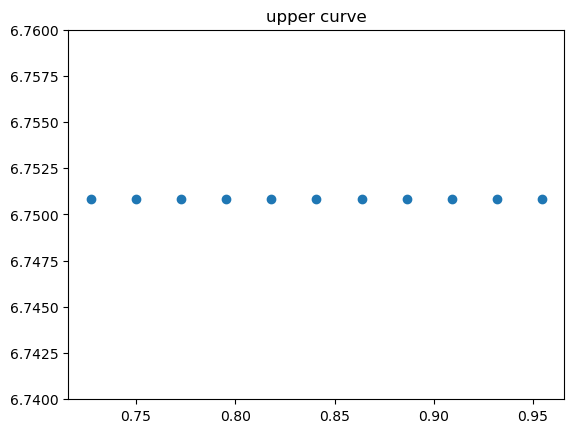

In [16]:
## Fit to lower curve

#Rescale to 1 flux quantum
norm_currents = currents/44
plt.scatter(norm_currents,s21_resfit)
plt.title("scaled flux tuning data")
plt.show()

fit_x = norm_currents[0:27]
fit_y = abs(s21_resfit[0:27])/10**9
print(type(fit_y[1]))
plt.scatter(fit_x,fit_y)
plt.title("Local ROI (lower curve) + my guess")
plt.plot(fit_x,avoided_crossing_lower(fit_x,11,6.745,.1,1),'c--')
plt.show()


popt, pcov = curve_fit(avoided_crossing_lower,fit_x,fit_y,p0=[13,6.745,.01,1])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt)

plt.scatter(fit_x,fit_y)
plt.plot(fit_x,avoided_crossing_lower(fit_x,*popt),'r--')
plt.title('Fitted curve')
plt.show()
#plt.show()

## fit to upper curve
fit_x2 = norm_currents[32:43]
fit_y2 = abs(s21_resfit[32:43])/10**9
#print(fit_x2)
#print(fit_y2)
wc_exp = np.mean(fit_y2)
print(wc_exp)
#print(type(fit_y[1]))
plt.scatter(fit_x2,fit_y2)
plt.title('upper curve')
plt.ylim([6.74,6.76])
plt.show()

6.750850313057884


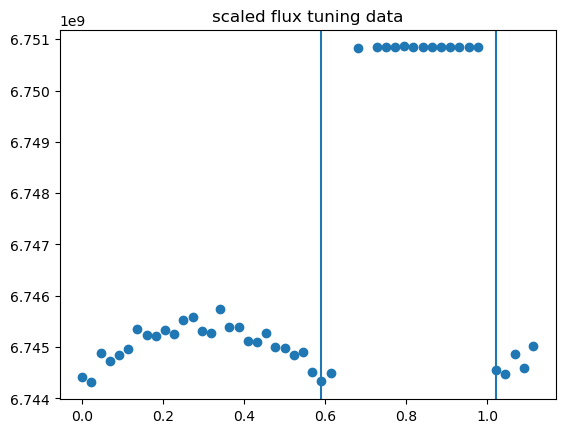

[ 7.68491425 -0.08540594 -0.61667541  1.07890416]


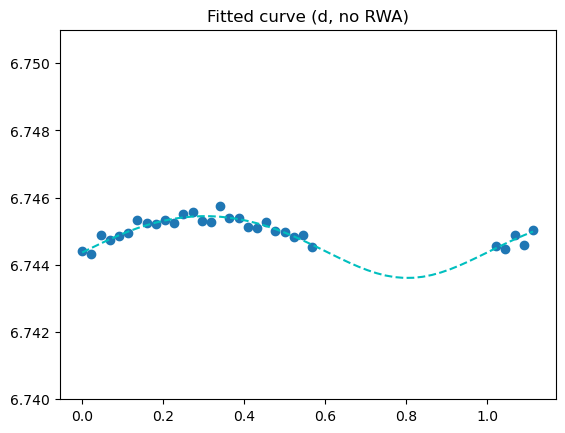

[1.12313228e+03 2.11123427e+01 8.97475137e-01 1.00000000e+00]


C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


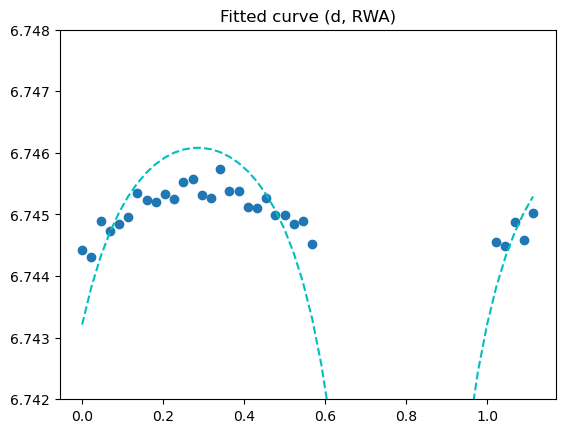

In [45]:
def avoided_crossing_lower_punchout(x, wq_max, g,phi_offset):
    wc = wc_exp
    wq = wq_max*np.emath.sqrt(abs( (np.cos(np.pi*x-phi_offset))))
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2) )

def avoided_crossing_lower_punchout_d(x, wq_max, g,phi_offset,d):
    wc = wc_exp
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2) )
                                    
def avoided_crossing_lower_punchout_rwa(x, wq_max, g,phi_offset,d):
    wc = wc_exp
    wq = wq_max*np.emath.sqrt(abs( (np.cos(np.pi*x-phi_offset))))
    return 1/2*( (wc+wq)-np.emath.sqrt(4*g**2+(wc-wq)**2) )
                                    
def avoided_crossing_lower_punchout_rwa_d(x, wq_max, g,phi_offset,d):
    wc = wc_exp
    wq = wq_max*np.emath.sqrt(abs( (np.cos(np.pi*x-phi_offset))))
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2) )

print(wc_exp)
plt.scatter(norm_currents,s21_resfit)
plt.title("scaled flux tuning data")
plt.axvline(norm_currents[26])
plt.axvline(norm_currents[45])
plt.show()

start1=0
stop1=26
start2=45
stop2=50

fit_x = np.concatenate((norm_currents[start1:stop1],norm_currents[start2:stop2]))
fit_y = abs(np.concatenate((s21_resfit[start1:stop1],s21_resfit[start2:stop2])))/10**9
#print(type(fit_y[1]))
plt.scatter(fit_x,fit_y)
plt.title("Local ROI (lower curve) + my guess")
#plt.plot(fit_x,avoided_crossing_lower_punchout(fit_x,11,.03,0),'c--')
plt.ylim([6.74,6.751])

popt, pcov = curve_fit(avoided_crossing_lower_punchout_d,fit_x,fit_y,p0=[11,.01,0,.05])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt)
plt.plot(norm_currents[start1:stop2],avoided_crossing_lower_punchout_d(norm_currents[start1:stop2],*popt),'c--')
plt.title('Fitted curve (d, no RWA)')
plt.show()
popt2, pcov2 = curve_fit(avoided_crossing_lower_punchout_rwa_d,fit_x,fit_y)#,p0=[15,.01,0,.05])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt2)
plt.plot(norm_currents[start1:stop2],avoided_crossing_lower_punchout_rwa_d(norm_currents[start1:stop2],*popt2),'c--')
plt.scatter(fit_x,fit_y)
plt.title('Fitted curve (d, RWA)')
plt.ylim([6.742,6.748])
plt.show()

In [31]:
print(fit_y)

[6.74441559 6.7443104  6.74489458 6.74473451 6.74484782 6.74496061
 6.74534487 6.7452347  6.74520847 6.74532895 6.74525036 6.74552459
 6.74557972 6.74531408 6.74526533 6.74574316 6.74538226 6.74538314
 6.74512209 6.74510448 6.74526557 6.7449965  6.74499023 6.74484221
 6.7448954  6.74452337 6.74455273 6.74448485 6.74487481 6.74458515
 6.74502488        nan]
